## Boston Dataset

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [2]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos.columns #columns in boston dataset

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [4]:
bos['MEDV'] = boston.target # adding price columns 

In [5]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bos.isnull().sum() # we can observe that there is no null value

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
import seaborn as sns

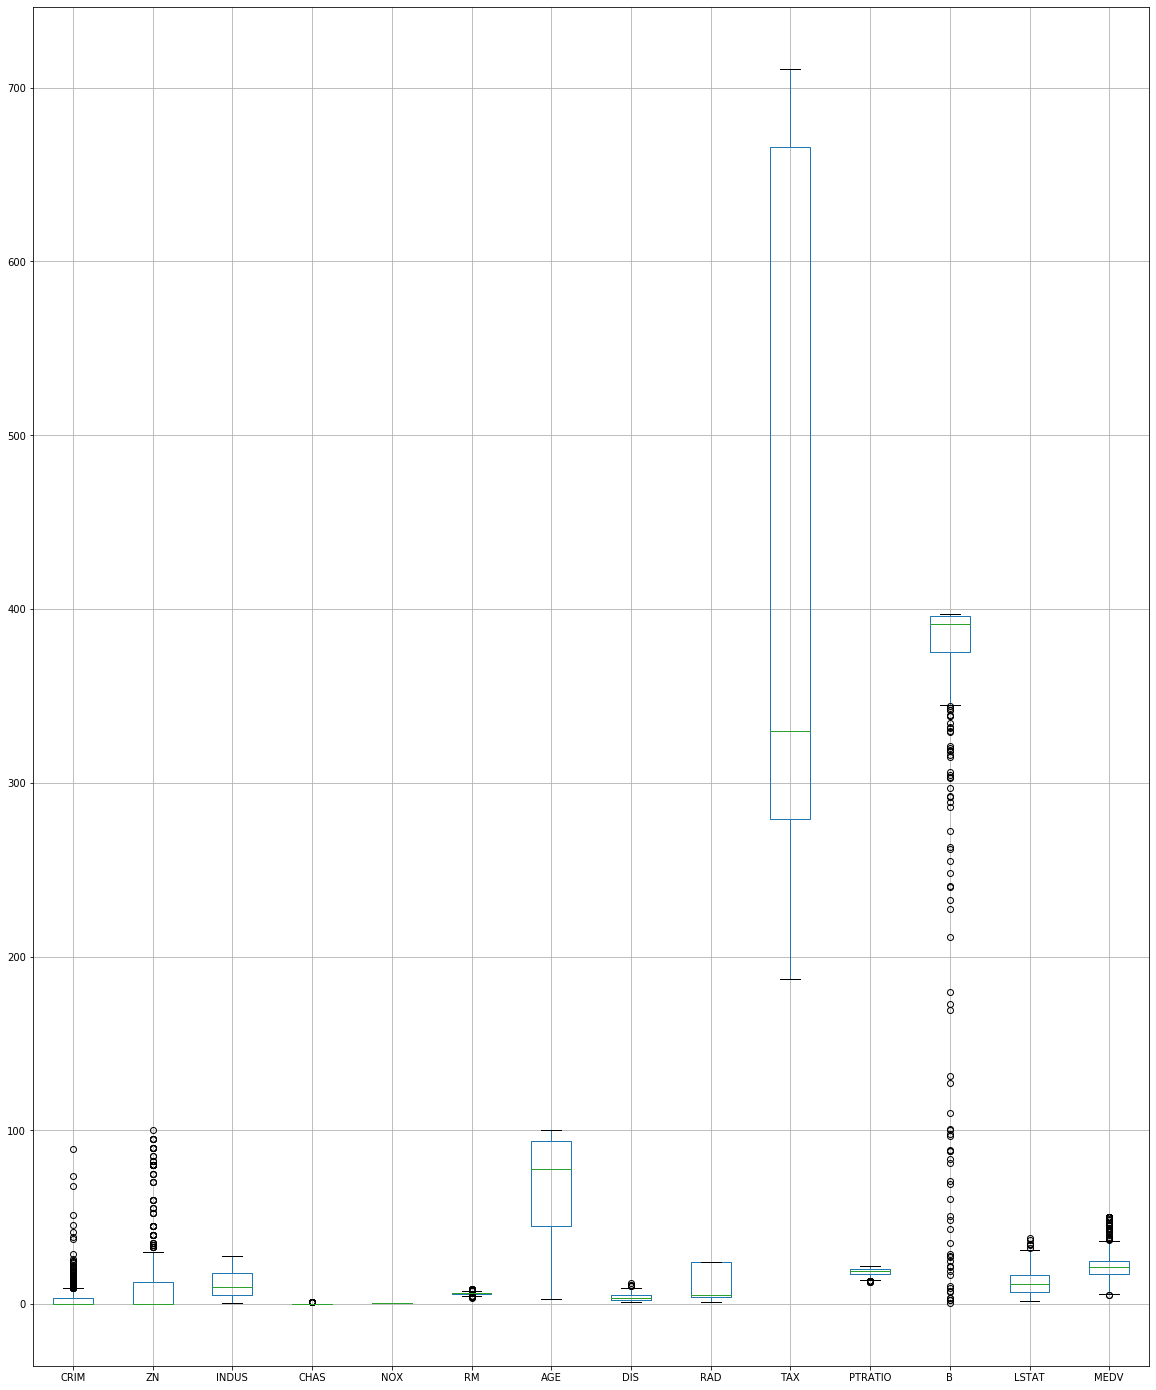

In [9]:
## Checking for outliers
plt.figure(figsize=(20,25))
bos.boxplot()

In [10]:
# removing outliers form iqr method
def iqr(bos,col):
    sorted(bos[col])
    quatile1,quatile3 = np.percentile(bos[col],[25,75])
    iqr_value = quatile3 - quatile1
    lower_bound = quatile1 - (1.5*iqr_value)
    upper_bound = quatile3 + (1.5*iqr_value)
    print(" {} --> Upper bound {} and Lower bound {}".format(col,upper_bound,lower_bound))

    bos[col]=np.where(bos[col]>upper_bound,upper_bound,bos[col])
    bos[col]=np.where(bos[col]<lower_bound,lower_bound,bos[col])

In [11]:
for i in bos:
    iqr(bos,i)

 CRIM --> Upper bound 9.06963875 and Lower bound -5.31051125
 ZN --> Upper bound 31.25 and Lower bound -18.75
 INDUS --> Upper bound 37.465 and Lower bound -14.175
 CHAS --> Upper bound 0.0 and Lower bound 0.0
 NOX --> Upper bound 0.8865 and Lower bound 0.18650000000000005
 RM --> Upper bound 7.730499999999999 and Lower bound 4.778500000000001
 AGE --> Upper bound 167.64999999999998 and Lower bound -28.54999999999999
 DIS --> Upper bound 9.820800000000002 and Lower bound -2.5322000000000005
 RAD --> Upper bound 54.0 and Lower bound -26.0
 TAX --> Upper bound 1246.5 and Lower bound -301.5
 PTRATIO --> Upper bound 24.4 and Lower bound 13.199999999999998
 B --> Upper bound 427.49625000000003 and Lower bound 344.10624999999993
 LSTAT --> Upper bound 31.962500000000006 and Lower bound -8.057500000000005
 MEDV --> Upper bound 36.962500000000006 and Lower bound 5.0624999999999964


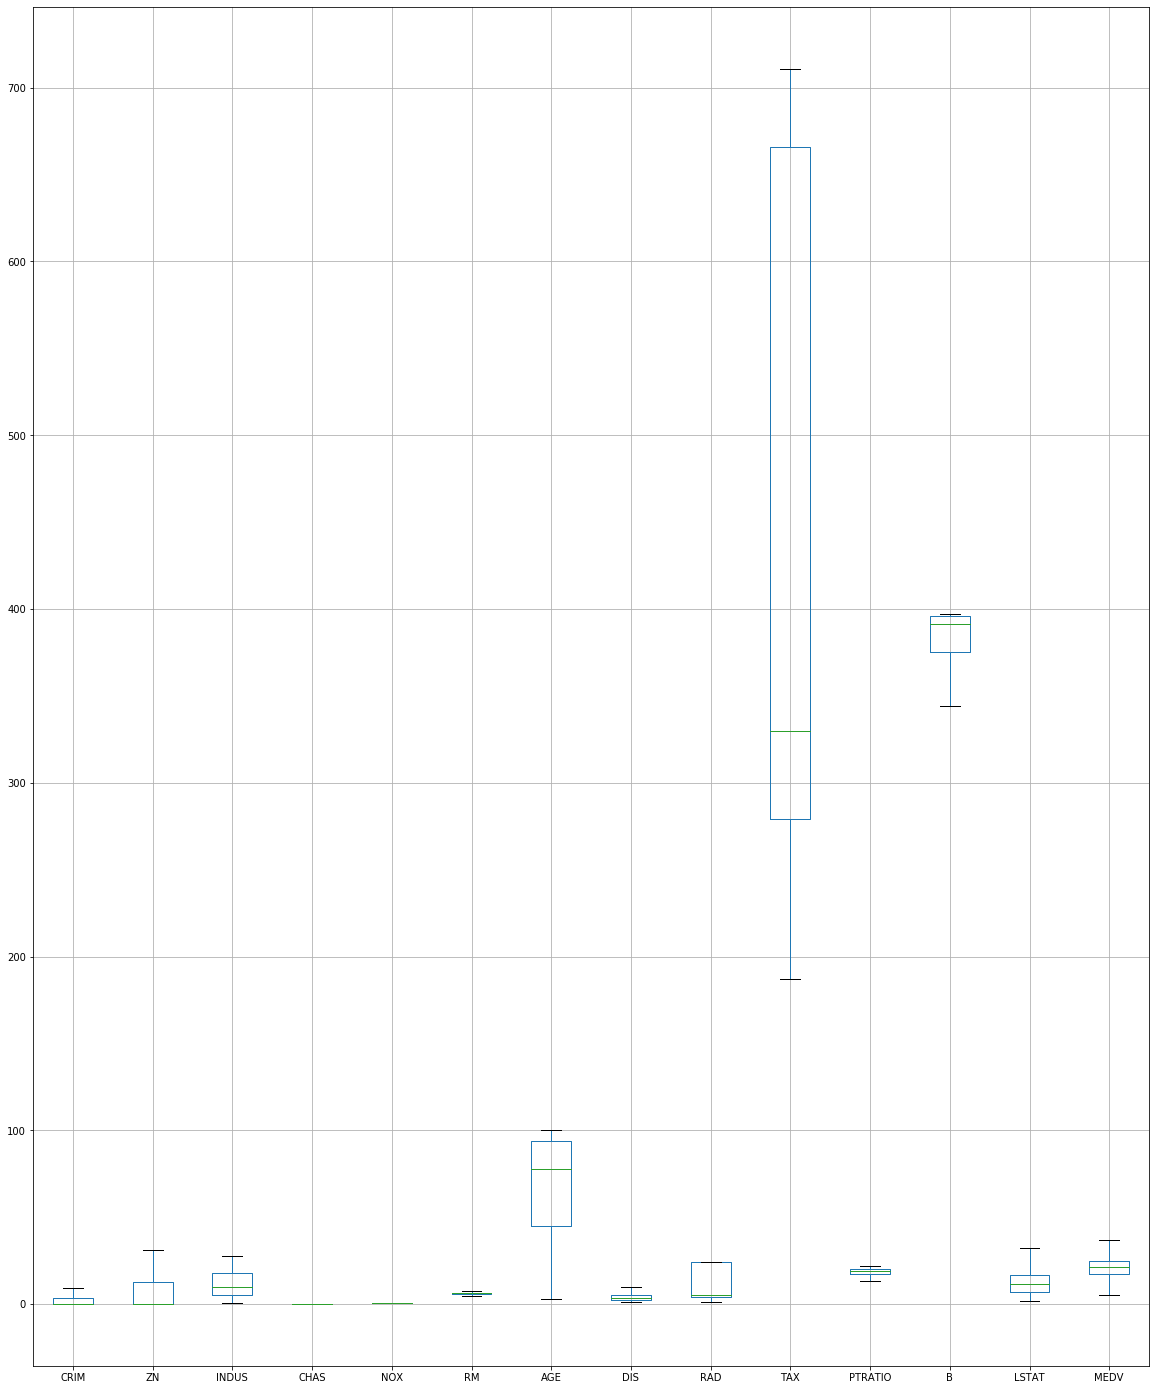

In [12]:
plt.figure(figsize=(20,25))
bos.boxplot()

In [13]:
y = bos['MEDV']


In [14]:
X = bos.drop(columns=['MEDV']) # dropping the target columns
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
## standard scaler trasform the data in such a mannaer that it has mean as 0 and standard deviation as 1
scaler = StandardScaler() 


X_scaler = scaler.fit_transform(X)

In [17]:
X_scaler

array([[-0.67029001,  0.91842034, -1.2879095 , ..., -1.4771812 ,
         0.78698807, -1.08874875],
       [-0.66394877, -0.57947069, -0.59338101, ..., -0.30994139,
         0.78698807, -0.49530164],
       [-0.66395481, -0.57947069, -0.59338101, ..., -0.30994139,
         0.57318348, -1.22427153],
       ...,
       [-0.65384327, -0.57947069,  0.11573841, ...,  1.18412558,
         0.78698807, -0.99459609],
       [-0.63909135, -0.57947069,  0.11573841, ...,  1.18412558,
         0.60575322, -0.87476542],
       [-0.6578764 , -0.57947069,  0.11573841, ...,  1.18412558,
         0.78698807, -0.67504764]])

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check the correlation


In [19]:
variables=X_scaler
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Feature']=X.columns

C:\Users\ayushi jajoo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [20]:
vif

,VIF,Feature
0,9.333758,CRIM
1,2.431520,ZN
2,3.978715,INDUS
3,NaN,CHAS
4,4.461754,NOX
5,2.028339,RM
6,3.104069,AGE
7,4.100129,DIS
8,12.429559,RAD
9,8.568666,TAX


In [21]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.370213,0.629315,NaN,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.538589
ZN,-0.370213,1.000000,-0.584079,NaN,-0.549670,0.357439,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.428126
INDUS,0.629315,-0.584079,1.000000,NaN,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.561174
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.663412,-0.549670,0.763651,NaN,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.506505
RM,-0.260057,0.357439,-0.408704,NaN,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.697645
AGE,0.518951,-0.583149,0.644779,NaN,0.731470,-0.258788,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.458662
DIS,-0.555054,0.681019,-0.713079,NaN,-0.775934,0.224486,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.333079
RAD,0.926977,-0.344043,0.595129,NaN,0.611441,-0.206041,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.452679
TAX,0.870686,-0.383860,0.720760,NaN,0.668023,-0.292737,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.543545


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=40)

In [24]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [25]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
regression.score(X_train,y_train)

0.792022603272702

In [27]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [28]:
adj_r2(X_train,y_train)

0.7850900233817921

In [29]:
regression.score(X_test,y_test)

0.7481134795944662

In [30]:
adj_r2(X_test,y_test)

0.7109029708981942

In [31]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [32]:
alpha = lasscv.alpha_
alpha

0.0003340051997371411

In [33]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0003340051997371411, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
lasso_reg.score(X_test, y_test)

0.7481144844507088

In [35]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([7.50032024, 7.38664342, 8.32980117, 6.46430482, 8.30532495,
       2.62062596, 6.63512453, 6.50064236, 5.25286506, 0.5412682 ,
       7.15597623, 5.49198116, 6.81224321, 9.22177118, 7.29145273,
       1.41895939, 1.99083602, 8.6552178 , 9.46674296, 2.6285257 ,
       7.31868537, 9.82209468, 3.70201986, 7.47513823, 7.46780011,
       4.8143111 , 1.50651999, 8.71608889, 5.01997137, 0.17767211,
       0.83223506, 7.22670959, 3.92531562, 9.46211548, 6.34104785,
       4.39246203, 6.15847524, 6.32716479, 5.49378784, 5.55268702,
       4.73447301, 2.50158232, 4.20615032, 3.58297399, 1.80778566,
       0.19443585, 6.60920363, 7.93444008, 3.30268292, 0.85896943]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [36]:
ridgecv.alpha_

0.17767211156148877

In [37]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.17767211156148877, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
ridge_model.score(X_test, y_test)

0.7480466389865421

In [39]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)
print(elasticCV.alpha_)
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.0108324437644523


0.5

In [40]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.0108324437644523, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [41]:
elasticnet_reg.score(X_test, y_test)

0.747240215036868